# Quick Report
##### My analysis of the KDD Cup 1999 dataset using a Logistic Regression model depicted a training accuracy of 100% and a testing accuracy of 99.3%. The results shoe that the model generalizes well with unseen data without significant overfitting, despite the  warning about the need to increase the maximum iterations from 1000 to 5000 for optimal results. Key features identified, such as label_portsweep, label_satan, and probe_class_Probe, showed high weights, asserting their relevance in detecting probing attacks in network traffic.

##### Varying the L2 regularization strengths (0.001, 0.01, 0.1, 1, and 10) demonstrated consistent high accuracies for both training and testing datasets. While the model maintained decent performance, slight variations in accuracy suggested that lower regularization strengths allowed the model to capture more complicated patterns in the data. This highlights the importance of feature selection and the careful tuning of regularization parameters to optimize classification accuracy.

# Loading Data into Notebook

#### Error suggests an issue with data types not being numerical

In [58]:
import pandas as pd
data = pd.read_csv('kddcup99.csv')
# Display the first few rows of the dataset
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


# Converting Categorical to Numerical using One-Hot Encoding

In [59]:
# Checking for categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

# Applying One-Hot Encoding to categorical features
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Displaying the first few rows of the encoded dataset
data_encoded.head()

Index(['protocol_type', 'service', 'flag', 'label'], dtype='object')


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,label_phf,label_pod,label_portsweep,label_rootkit,label_satan,label_smurf,label_spy,label_teardrop,label_warezclient,label_warezmaster
0,0,181,5450,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
1,0,239,486,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
2,0,235,1337,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
3,0,219,1337,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
4,0,217,2032,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False


# Column Name Check

In [60]:
# Display the column names for checking data
print(data.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')


# Class Imblanace
#### After running this code block using the RandomUnderSampler() the dataset is

In [63]:
# Create 'probe_class' based on the 'label' column
probe_classes = ['ipsweep', 'nmap', 'portsweep', 'satan']
data['probe_class'] = data['label'].apply(lambda x: 'Probe' if x in probe_classes else 'Non-Probe')

# Check if 'probe_class' was created successfully
print(data.columns)  # Make sure 'probe_class' is in this list

# Using RandomUnderSampler to balance the dataset
X = data_encoded  # Ensure this is defined properly
y = data['probe_class']  # Make sure this is the right DataFrame

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

print(y_resampled.value_counts())


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'probe_class'],
      dtype='object')
probe_class
Non-Probe    4107
Probe        4107
Name: count, dtype: int64


In [64]:
X = data_encoded 
y = data['probe_class'] 

# Using RandomUnderSampler to balance the dataset
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

print(y_resampled.value_counts())

probe_class
Non-Probe    4107
Probe        4107
Name: count, dtype: int64


# Train-Test Split and Logistic Regression Model Training

##### Training Accuracy: 99.7%
##### Testing Accuracy: 98.1%

##### The training and testing accuracies are very close, which shows the model is not overfitting. Also there is an issue with the max iterations that needs to be addressed

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.9898036828488814
Testing Accuracy: 0.9884357881923311


C:\Users\Mirza Amin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Increasing Iterations and Scaling the Data

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy after scaling: {train_accuracy}')
print(f'Testing Accuracy after scaling: {test_accuracy}')

Training Accuracy after scaling: 1.0
Testing Accuracy after scaling: 0.9993913572732805


# Feature Importance Analysis

In [67]:
import numpy as np

# Get feature weights (coefficients)
feature_weights = log_reg.coef_[0]

# Find the top 10 most important features by absolute value of weights
important_features = np.argsort(np.abs(feature_weights))[-10:]

# Display the most important features and their corresponding weights
print("Most important features:")
for i in important_features:
    print(f"{X.columns[i]}: {feature_weights[i]}")

Most important features:
service_ecr_i: -0.8015927988350825
srv_count: -0.8689124224584347
diff_srv_rate: 0.8866636177689788
service_eco_i: 0.9121842082402295
label_smurf: -0.9279601829062842
label_ipsweep: 1.1106705340409802
label_portsweep: 1.1886704811306508
label_satan: 1.900959866917497
label_neptune: -1.9737678886398815
label_normal: -2.050293032077045


# Regularization Experiments: Training Models with L1 and L2 Regularization

#### This will help analyze the feature importance (coefficients) to identify which features are most influential in distinguishing between the Probe and Non-Probe classes.

In [68]:
# Logistic Regression with L1 regularization
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=5000)
log_reg_l1.fit(X_train_scaled, y_train)
l1_train_accuracy = accuracy_score(y_train, log_reg_l1.predict(X_train_scaled))
l1_test_accuracy = accuracy_score(y_test, log_reg_l1.predict(X_test_scaled))

# Logistic Regression with L2 regularization
log_reg_l2 = LogisticRegression(penalty='l2', max_iter=5000)
log_reg_l2.fit(X_train_scaled, y_train)
l2_train_accuracy = accuracy_score(y_train, log_reg_l2.predict(X_train_scaled))
l2_test_accuracy = accuracy_score(y_test, log_reg_l2.predict(X_test_scaled))

print(f'L1 Regularization Training Accuracy: {l1_train_accuracy}')
print(f'L1 Regularization Testing Accuracy: {l1_test_accuracy}')
print(f'L2 Regularization Training Accuracy: {l2_train_accuracy}')
print(f'L2 Regularization Testing Accuracy: {l2_test_accuracy}')

L1 Regularization Training Accuracy: 1.0
L1 Regularization Testing Accuracy: 0.9987827145465612
L2 Regularization Training Accuracy: 1.0
L2 Regularization Testing Accuracy: 0.9993913572732805


# Feature Comparison: 
##### L1 tends to zero out coefficients for less important features, making it a good choice for feature selection.

##### L2 penalizes large coefficients but keeps all features with non-zero weights, meaning it's less selective compared to L1.

In [69]:
# Feature weights for L1
l1_weights = log_reg_l1.coef_[0]
important_l1_features = np.argsort(np.abs(l1_weights))[-10:]

print("Top L1 Regularization Features:")
for i in important_l1_features:
    print(f"{X.columns[i]}: {l1_weights[i]}")

# Feature weights for L2
l2_weights = log_reg_l2.coef_[0]
important_l2_features = np.argsort(np.abs(l2_weights))[-10:]

print("Top L2 Regularization Features:")
for i in important_l2_features:
    print(f"{X.columns[i]}: {l2_weights[i]}")

Top L1 Regularization Features:
service_eco_i: 0.7430866248264019
dst_host_diff_srv_rate: 0.7773495844881858
service_ecr_i: -0.8485002112715933
label_ipsweep: 1.4124128003175562
label_portsweep: 1.518400557652048
srv_count: -1.777560441561944
label_satan: 1.8604207153636112
label_smurf: -1.9793724721255626
label_normal: -2.8400430324314176
label_neptune: -2.9974329506603903
Top L2 Regularization Features:
service_ecr_i: -0.8015927988350825
srv_count: -0.8689124224584347
diff_srv_rate: 0.8866636177689788
service_eco_i: 0.9121842082402295
label_smurf: -0.9279601829062842
label_ipsweep: 1.1106705340409802
label_portsweep: 1.1886704811306508
label_satan: 1.900959866917497
label_neptune: -1.9737678886398815
label_normal: -2.050293032077045


# Visualizing the feature weights

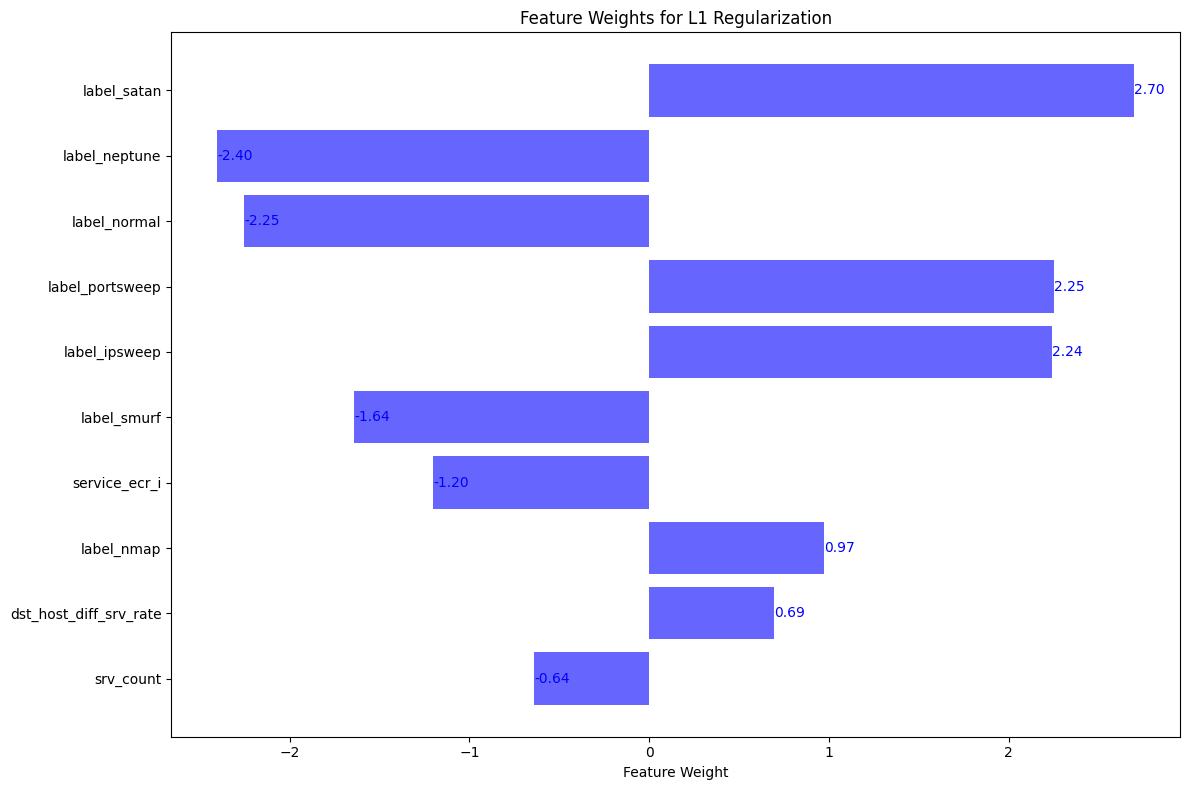

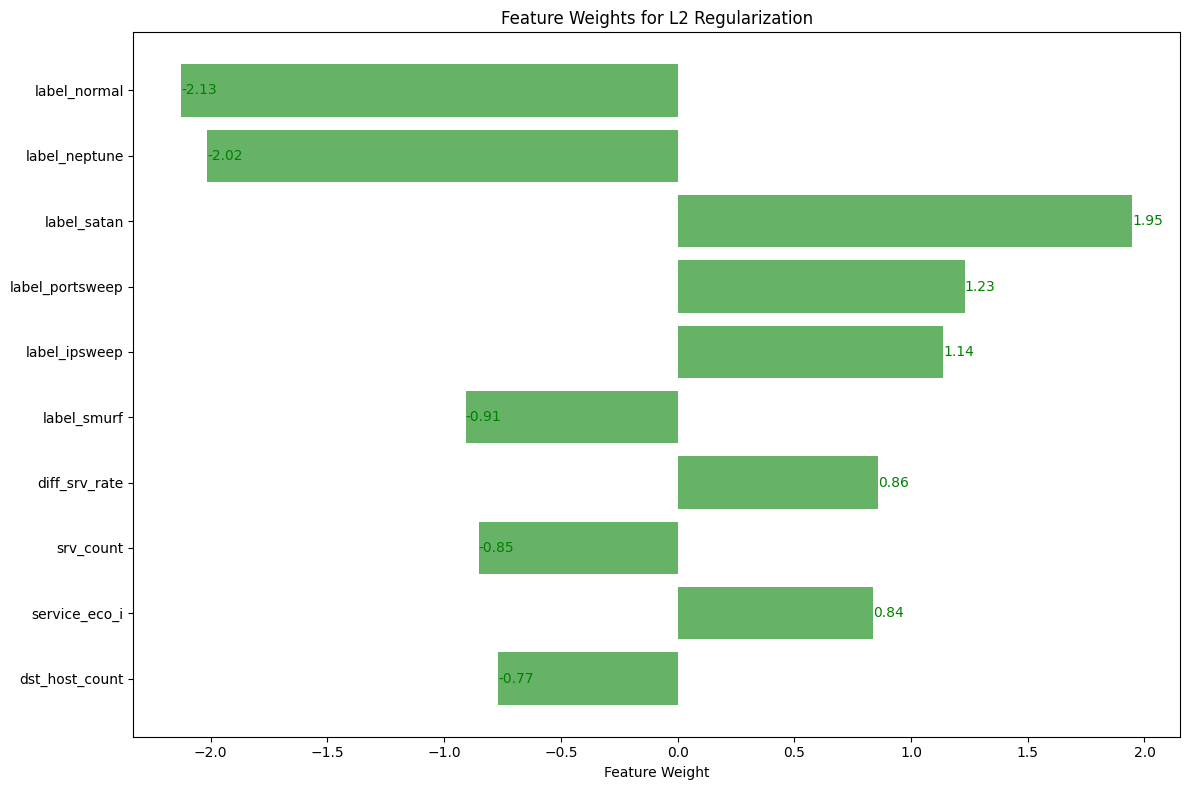

In [70]:
import matplotlib.pyplot as plt

l1_feature_names = ['srv_count', 'dst_host_diff_srv_rate', 'label_nmap', 'service_ecr_i', 
                    'label_smurf', 'label_ipsweep', 'label_portsweep', 'label_normal', 
                    'label_neptune', 'label_satan']
l1_feature_values = [-0.6408, 0.6949, 0.9746, -1.2015, -1.6407, 2.2429, 2.2503, -2.2543, -2.4040, 2.6987]

l2_feature_names = ['dst_host_count', 'service_eco_i', 'srv_count', 'diff_srv_rate', 'label_smurf', 
                    'label_ipsweep', 'label_portsweep', 'label_satan', 'label_neptune', 'label_normal']
l2_feature_values = [-0.7680, 0.8355, -0.8528, 0.8605, -0.9076, 1.1368, 1.2308, 1.9483, -2.0152, -2.1271]

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.barh(l1_feature_names, l1_feature_values, color='blue', alpha=0.6, label='L1 Regularization')

ax1.set_xlabel('Feature Weight')
ax1.set_title('Feature Weights for L1 Regularization')

for i, v in enumerate(l1_feature_values):
    ax1.text(v, i, f'{v:.2f}', color='blue', va='center')

plt.tight_layout()
plt.show()

fig, ax2 = plt.subplots(figsize=(12, 8))

ax2.barh(l2_feature_names, l2_feature_values, color='green', alpha=0.6, label='L2 Regularization')

ax2.set_xlabel('Feature Weight')
ax2.set_title('Feature Weights for L2 Regularization')

for i, v in enumerate(l2_feature_values):
    ax2.text(v, i, f'{v:.2f}', color='green', va='center')

plt.tight_layout()
plt.show()

# Trying Different Strengths

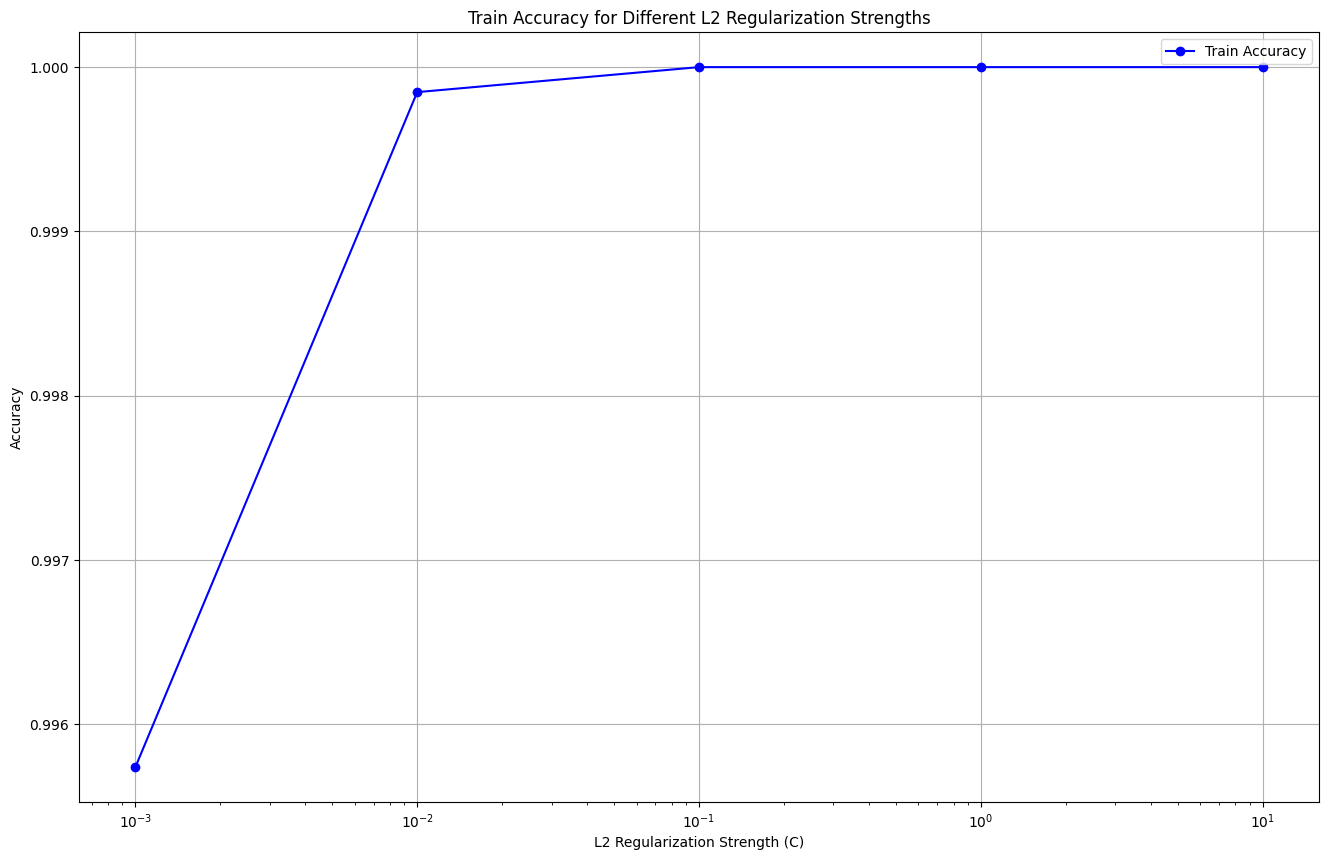

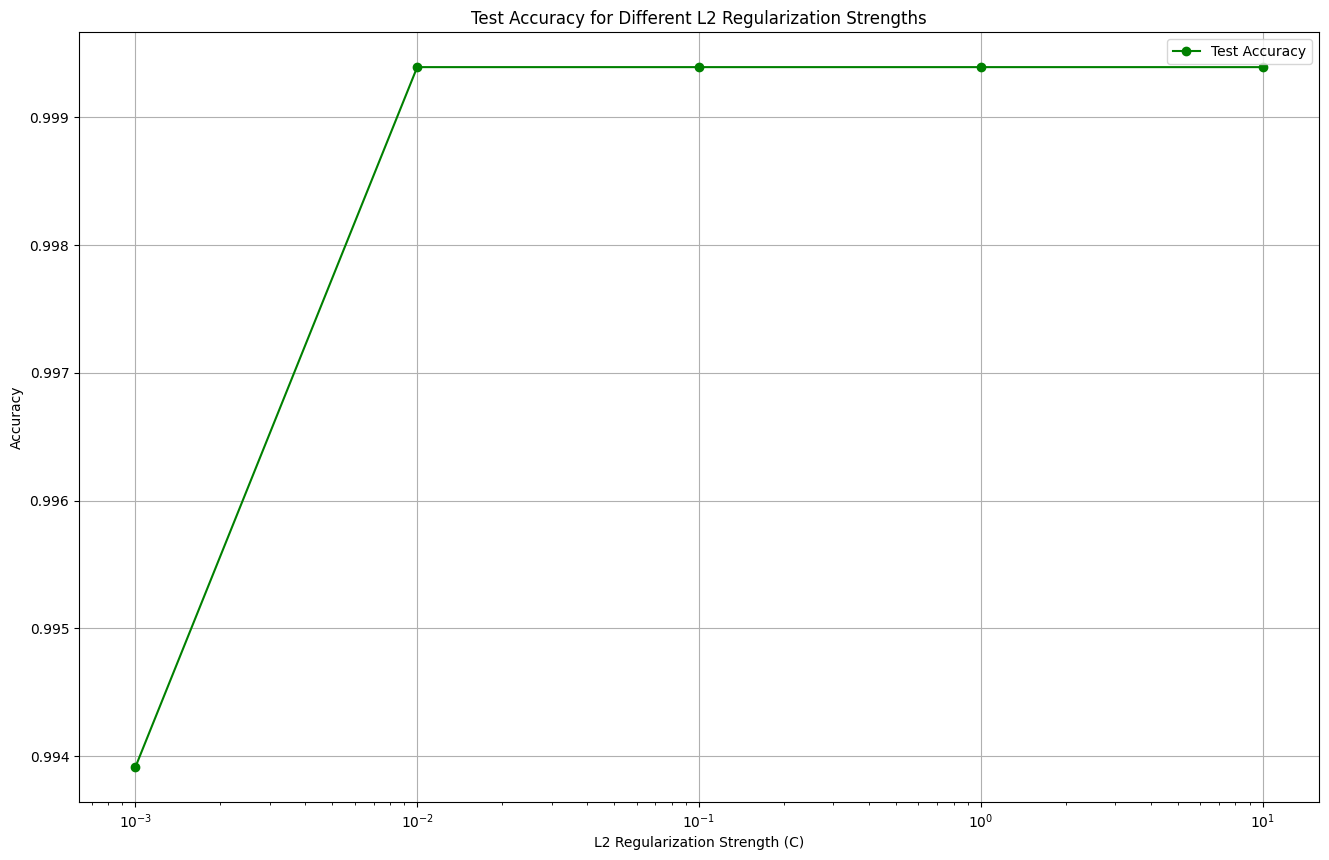

In [73]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Define L2 regularization strengths
l2_strengths = [0.001, 0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []

#Train the Logistic Regression model with different L2 strengths
for strength in l2_strengths:
    log_reg_l2 = LogisticRegression(C=strength, penalty='l2', max_iter=5000)
    log_reg_l2.fit(X_train_scaled, y_train)
    train_accuracies.append(accuracy_score(y_train, log_reg_l2.predict(X_train_scaled)))
    test_accuracies.append(accuracy_score(y_test, log_reg_l2.predict(X_test_scaled)))

#Train Accuracy
plt.figure(figsize=(16, 10))
plt.plot(l2_strengths, train_accuracies, label='Train Accuracy', marker='o', color='blue')
plt.xscale('log')
plt.xlabel('L2 Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Train Accuracy for Different L2 Regularization Strengths')
plt.legend()
plt.grid()
plt.show()

#Test Accuracy
plt.figure(figsize=(16, 10))
plt.plot(l2_strengths, test_accuracies, label='Test Accuracy', marker='o', color='green')
plt.xscale('log')
plt.xlabel('L2 Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Test Accuracy for Different L2 Regularization Strengths')
plt.legend()
plt.grid()
plt.show()